# Getting Files

In [35]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('Dataset_English/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Dataset_English/jigsaw-toxic-comment-classification-challenge\sample_submission.csv.zip
Dataset_English/jigsaw-toxic-comment-classification-challenge\test.csv.zip
Dataset_English/jigsaw-toxic-comment-classification-challenge\test_labels.csv.zip
Dataset_English/jigsaw-toxic-comment-classification-challenge\train.csv.zip


# Load Data

In [36]:
train_data = pd.read_csv('Dataset_English/jigsaw-toxic-comment-classification-challenge/train.csv.zip')
test_data = pd.read_csv('Dataset_English/jigsaw-toxic-comment-classification-challenge/test.csv.zip')
test_labels = pd.read_csv('Dataset_English/jigsaw-toxic-comment-classification-challenge/test_labels.csv.zip')

# Reviewing Data

In [37]:
train_data.shape

(159571, 8)

In [38]:
total_Characters = train_data['comment_text'].apply(len).sum()

print(total_Characters) #38586359  62882658

62882658


In [39]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


# Checking for imbalance data

In [40]:
labels_cols = (train_data.drop(['id', 'comment_text'], axis=1)).columns.values
labels_cols

array(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'], dtype=object)

In [41]:
print(train_data[labels_cols].isnull().sum())

toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


In [42]:
print(train_data[labels_cols].sum())

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64


In [43]:
train_data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


# Pre-Processing Stage

In [58]:
import re 
import nltk
from nltk.corpus import stopwords


nltk.download("stopwords")
nltk.download('punkt')
stop_words = set(stopwords.words("english"))

#stemmer = SnowballStemmer("english")


[nltk_data] Downloading package stopwords to C:\Users\Family-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Family-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [59]:
import contractions
from contractions import fix as contractions_fix
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
import string

def drop_stop_words(text):
    words = word_tokenize(text)
    wordsFiltered = []
    for w in words:
        if w.lower() not in stop_words:
            wordsFiltered.append(w)

    wordsFiltered = " ".join(wordsFiltered)
    return wordsFiltered


def remove_elongation(text):
    pattern = re.compile(r"(.)\1{2,}")
    return pattern.sub(r"\1", text)


def clean_text(text):
    try:
        url_pattern = r'https?://\S+|www\.\S+'
        text = re.sub(url_pattern, '', text)
        
        text = re.sub(r'#', '', text).strip()
        
        text = contractions.fix(text) # remove_punc
        text = text.translate(str.maketrans('', '', string.punctuation))
        
        extract_words = re.compile(r'\W+')  # remove_non_word
        text = extract_words.sub(' ', text)

        text = drop_stop_words(text)
        text = re.sub('[^a-zA-Z\s]', '', text) # remove_non_English_word
        
        text = re.sub(r'user(?:name)?\s', '', text) # remove_username
        text = remove_elongation(text)

        return text
    except Exception as e:
        print("Error processing text:", e)
        return text  # Return the original text if an error occurs"""

In [60]:
# train_data['isToxic'] = train_data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].any(axis=1).astype(int)

In [61]:
train_data['comment_text'] = train_data["comment_text"].apply(lambda x: clean_text(x))

In [62]:
# train_data['isToxic'] = train_data[['toxic', 'severe_toxic' , 'threat' , 'insult']].any(axis=1).astype(int)
train_data['isToxic'] = train_data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].any(axis=1).astype(int)

KeyError: "None of [Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',\n       'identity_hate'],\n      dtype='object')] are in the [columns]"

In [ ]:
# Select only the required columns
train_data = train_data[['comment_text', 'isToxic']]

total_Characters = train_data['comment_text'].apply(len).sum()

print(total_Characters)

38909079


In [ ]:
train_data.head(20)

# Assuming train_data is your DataFrame and 'isToxic' is the column with 0 and 1 values
toxic_counts = train_data['isToxic'].value_counts()
print("Counts of 0 and 1 in the 'isToxic' column:")
print(toxic_counts)

# Optionally, calculate the percentage of each category to see the balance more clearly
toxic_percentage = toxic_counts / len(train_data) * 100
print("Percentage of 0 and 1 in the 'isToxic' column:")
print(toxic_percentage)

# Check if the dataset is balanced
if abs(toxic_counts[0] - toxic_counts[1]) < 0.1 * len(train_data):
    print("The dataset is relatively balanced.")
else:
    print("The dataset is not balanced.")

Counts of 0 and 1 in the 'isToxic' column:
isToxic
0    143346
1     16225
Name: count, dtype: int64
Percentage of 0 and 1 in the 'isToxic' column:
isToxic
0    89.832112
1    10.167888
Name: count, dtype: float64
The dataset is not balanced.


In [ ]:
import pandas as pd

# Assuming train_data is your DataFrame with 'comment_text' and 'isToxic' columns
def calculate_total_characters(df):
    return df['comment_text'].apply(len).sum()

# Calculate current total characters
current_total_characters = calculate_total_characters(train_data)
print(f"Current total characters: {current_total_characters}")

# Define your new character limit
character_limit = 400000

# Filter data by class
non_toxic = train_data[train_data['isToxic'] == 0]
toxic = train_data[train_data['isToxic'] == 1]

# Calculate characters for each class
non_toxic_chars = calculate_total_characters(non_toxic)
toxic_chars = calculate_total_characters(toxic)

# Determine new character counts based on desired total and balance
# We try to balance the dataset while staying under the limit
desired_non_toxic_chars = min(non_toxic_chars, character_limit // 2)
desired_toxic_chars = min(toxic_chars, character_limit // 2)

# Function to sample rows by character limit
def sample_by_character_limit(df, max_chars):
    sampled_df = pd.DataFrame()
    current_chars = 0
    while current_chars < max_chars:
        row = df.sample(n=1)
        row_chars = len(row['comment_text'].iloc[0])
        if current_chars + row_chars > max_chars:
            break
        sampled_df = pd.concat([sampled_df, row])
        current_chars += row_chars
    return sampled_df

# Perform sampling
balanced_non_toxic = sample_by_character_limit(non_toxic, desired_non_toxic_chars)
balanced_toxic = sample_by_character_limit(toxic, desired_toxic_chars)

# Combine the sampled data
balanced_train_data = pd.concat([balanced_non_toxic, balanced_toxic])

# print(f"Final dataset size by characters: {calculate_total_characters(balanced_train_data)}")
# print(f"Final counts of each class: {balanced_train_data['isToxic'].value_counts()}")

Current total characters: 38909079
Final dataset size by characters: 399462
Final counts of each class: isToxic
1    1056
0     786
Name: count, dtype: int64


In [ ]:
# balanced_train_data.tail(20)

,comment_text,isToxic
18490,STOP EDITING POSTS DIPSHIT RIGHT STATE OPINION...,1
36069,message newyorkbrad Great stuck friends arbcom...,1
34529,Jews right expel Arab invaders homeland believ...,1
92524,Reverting valid edits vandalism Calling valid ...,1
73700,fuck fee umberella joke made sources let post ...,1
103483,really tried make sense comments Joni Mitchell...,1
127325,mena TOTAL BULLYING LITTLE HITLER CAM WEBSITE ...,1
26012,EPISODES SINCE MARCH DUMBASSES,1
55352,shut fuck upi know switch ip addresses dumb fu...,1
129370,really think known since forever idiot,1


In [ ]:
# balanced_train_data.head(20)

,comment_text,isToxic
36902,problems page copy edit iron extent please all...,0
65077,think AI read facts erase every detail enemy A...,0
19400,think may typo overzealous Californian writing...,0
139227,Tahirids Saffarids Samanids etc Wikipedias His...,0
34353,pls advertise ty copeartion Bot,0
80955,Fair enough understand opinionsthoughts must s...,0
131912,ARIN WHOIS database information OAISD website ...,0
74492,said scholars ie commentators obviously primar...,0
143441,editor removed protection template also remove...,0
53529,clear ever read book Irish history famine see ...,0


In [ ]:
from google.cloud import translate_v2 as translate

# Set up Google Cloud credentials (replace 'path_to_your_credentials.json' with the actual path)
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = 'GoogleKey/TranslationKey.json'

# Initialize the translation client
translate_client = translate.Client()

# Function to translate text
def translate_text(text, target_language='mt'):
    if isinstance(text, str):
        result = translate_client.translate(text, target_language=target_language)
        return result['translatedText']
    else:
        return text


## Translate the balanced dataset
balanced_train_data['comment_text'] = balanced_train_data['comment_text'].apply(lambda x: translate_text(x))

# Combine the original English balanced data and translated Maltese data
combined_data = pd.concat([train_data[['comment_text', 'isToxic']], balanced_train_data[['comment_text', 'isToxic']]])

# Print some examples of the combined data
print(balanced_train_data.head(10))


                                        comment_text  isToxic
0  Explanation edits made Hardcore Metallica Fan ...        0
1  Daww matches background colour seemingly stuck...        0
2  Hey man really trying edit war guy constantly ...        0
3  make real suggestions improvement wondered sec...        0
4                      sir hero chance remember page        0
5           Congratulations well use tools well talk        0
6                        COCKSUCKER PISS AROUND WORK        1
7  vandalism Matt Shirvington article reverted Pl...        0
8  Sorry word nonsense offensive Anyway intending...        0
9               alignment subject contrary DuLithgow        0


In [ ]:
combined_data.to_csv('MixedDataset/combined_data_backup.csv', index=False)
combined_data.to_csv('MixedDataset/combined_data.csv', index=False)
balanced_train_data.to_csv('Dataset_Maltese/maltese_data_backup.csv',index=False)
balanced_train_data.to_csv('Dataset_Maltese/maltese_data.csv',index=False)
train_data.to_csv('Dataset_English/english_data_backup.csv', index=False)
train_data.to_csv('Dataset_English/english_data.csv', index=False)

In [ ]:
# Print some examples of the combined data
print(balanced_train_data.tail(10))

                                             comment_text  isToxic
11092   lede time concensus xi ħadd meħuda fuqhom ħass...        1
96070   jista &#39;jixtieq jissuġġerixxi żid sigħat im...        1
137234  imblukkata raġuni bżonn jitgħallmu idjota fuck...        1
3008             Ħej Roy Mur fukk gay bich Ya smajt Pussy        1
80030   mur hack lilek innifsekmur hack lilek innifsek...        1
93899   Utent BadtoGod qed jipprova jwissi modifiki va...        1
28633   HONDASAREGOODSEZ FIRSTI NIGGER SWINGING TREE G...        1
152949  ċajta imdemmi nofs tużżana ċensuri lesti jqatt...        1
70475   Tlesti monopolju pro Russu shitheads crimea ar...        1
60991            wkoll xaħam unfunny crosseyed fagot nerd        1


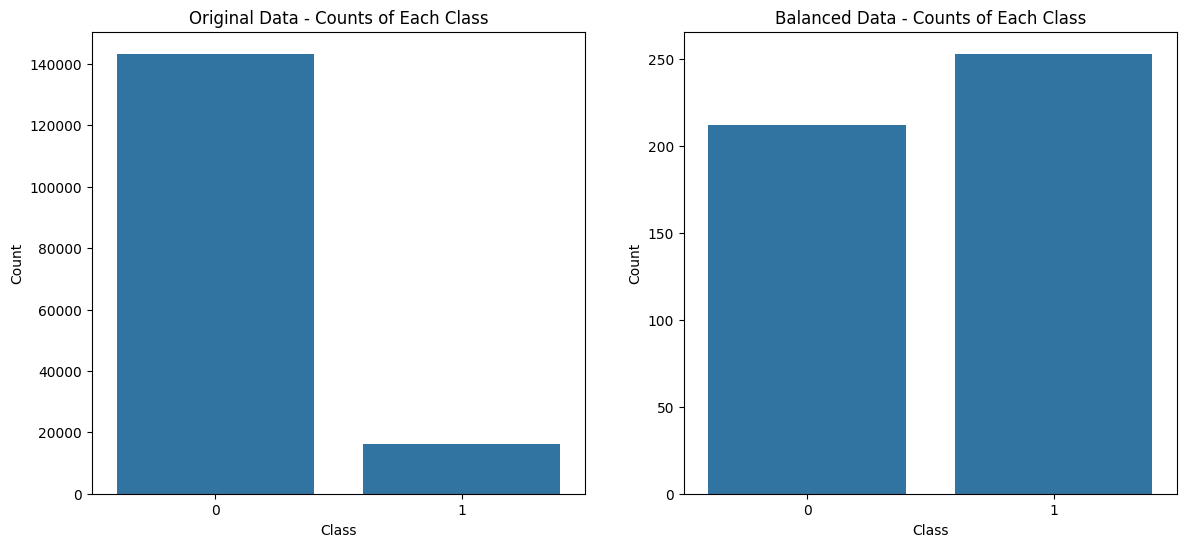

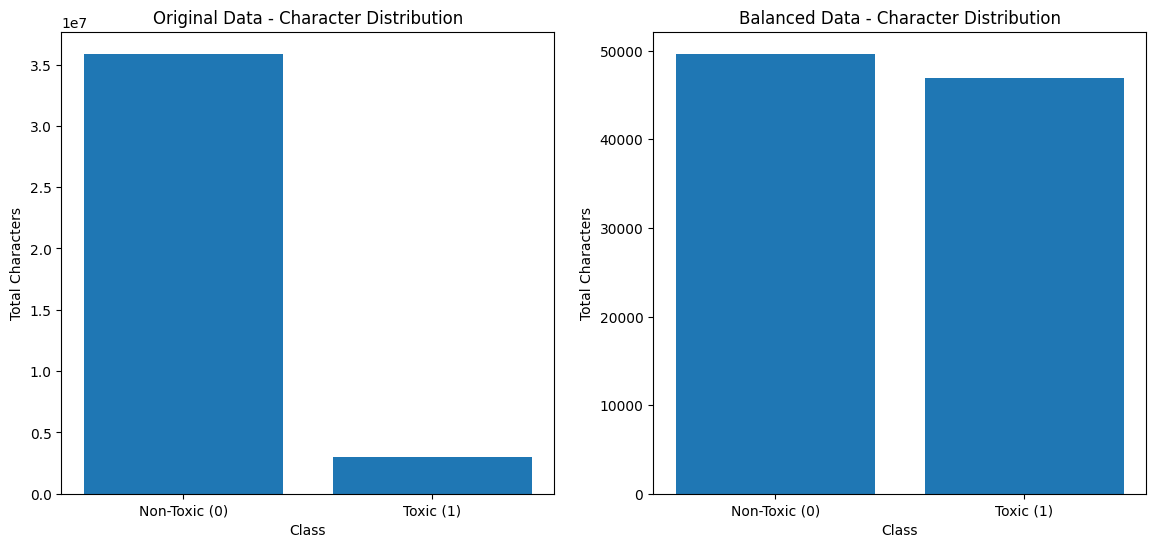

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the previous code block has been executed and `balanced_train_data` is available

# Plot the counts of each class before and after balancing
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Original data count plot
sns.countplot(x=train_data['isToxic'], ax=axes[0])
axes[0].set_title('Original Data - Counts of Each Class')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')

# Balanced data count plot
sns.countplot(x=balanced_train_data['isToxic'], ax=axes[1])
axes[1].set_title('Balanced Data - Counts of Each Class')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')

plt.show()

# Plotting character counts
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Original character distribution
original_chars = [calculate_total_characters(train_data[train_data['isToxic'] == 0]),
                  calculate_total_characters(train_data[train_data['isToxic'] == 1])]
axes[0].bar(['Non-Toxic (0)', 'Toxic (1)'], original_chars)
axes[0].set_title('Original Data - Character Distribution')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Total Characters')

# Balanced character distribution
balanced_chars = [calculate_total_characters(balanced_train_data[balanced_train_data['isToxic'] == 0]),
                  calculate_total_characters(balanced_train_data[balanced_train_data['isToxic'] == 1])]
axes[1].bar(['Non-Toxic (0)', 'Toxic (1)'], balanced_chars)
axes[1].set_title('Balanced Data - Character Distribution')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Total Characters')

plt.show()
